In [1]:
import pandas as pd

In [3]:
netflix_df = pd.read_csv('netflix.csv')
netflix_df

,title,genre,release,runtime,score,language
0,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
1,Leyla Everlasting,Comedy,2020-12-04,112,3.7,Turkish
2,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi
3,Searching for Sheela,Documentary,2021-04-22,58,4.1,English
4,The Call,Drama,2020-11-27,112,4.1,Korean
...,...,...,...,...,...,...
225,Seaspiracy,Documentary,2021-03-24,89,8.2,English
226,The Three Deaths of Marisela Escobedo,Documentary,2020-10-14,109,8.2,Spanish
227,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
228,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     230 non-null    object 
 1   genre     230 non-null    object 
 2   release   230 non-null    object 
 3   runtime   230 non-null    int64  
 4   score     230 non-null    float64
 5   language  230 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.9+ KB


In [6]:
netflix_df.describe()

,runtime,score
count,230.000000,230.000000
mean,95.595652,6.252174
std,24.607965,1.002952
min,16.000000,2.600000
25%,87.250000,5.600000
50%,97.000000,6.300000
75%,108.750000,7.000000
max,151.000000,9.000000


In [12]:
netflix_df.groupby('genre').count() #각 컬럼별 결측값 확인

,title,release,runtime,score,language
genre,,,,,
Comedy,33,33,33,33,33
Documentary,80,80,80,80,80
Drama,59,59,59,59,59
Romantic comedy,27,27,27,27,27
Thriller,31,31,31,31,31


In [14]:
netflix_df.groupby('genre').size() #row가 몇개있는지 확인

genre
Comedy             33
Documentary        80
Drama              59
Romantic comedy    27
Thriller           31
dtype: int64

In [17]:
netflix_df.groupby('genre').min(numeric_only=True)#다큐, 드라마는 런타임이 비교적 짧음

,runtime,score
genre,,
Comedy,30,3.7
Documentary,16,4.1
Drama,17,4.1
Romantic comedy,85,4.1
Thriller,81,2.6


In [18]:
netflix_df.groupby('genre').max(numeric_only=True)

,runtime,score
genre,,
Comedy,139,7.2
Documentary,144,9.0
Drama,151,7.9
Romantic comedy,131,6.8
Thriller,149,7.3


In [19]:
netflix_df.groupby('genre').mean(numeric_only=True)

,runtime,score
genre,,
Comedy,95.575758,5.518182
Documentary,81.262500,6.941250
Drama,106.440678,6.267797
Romantic comedy,101.555556,5.722222
Thriller,106.774194,5.687097


In [20]:
netflix_df.groupby('genre')['score'].mean()#score에 대한 컬럼만 보고싶을 때 

genre
Comedy             5.518182
Documentary        6.941250
Drama              6.267797
Romantic comedy    5.722222
Thriller           5.687097
Name: score, dtype: float64

In [21]:
import pandas as pd 

clothes_df = pd.DataFrame({
    'size': ['L', 'S', 'XS', 'L', 'S', 'XL', 'L', 'S', 'M', 'XS',
            'M', 'M', 'XS', 'L', 'XL', 'XS', 'M', 'S', 'L', 'XL'],
    'sales': [130, 200, 120, 120, 140, 160, 190, 90, 110, 100,
            150, 180, 100, 200, 80, 140, 150, 90, 80, 130]
})

clothes_df

,size,sales
0,L,130
1,S,200
2,XS,120
3,L,120
4,S,140
5,XL,160
6,L,190
7,S,90
8,M,110
9,XS,100


In [23]:
clothes_df.set_index('size')

,sales
size,
L,130
S,200
XS,120
L,120
S,140
XL,160
L,190
S,90
M,110


In [34]:
clothes_df = clothes_df.sort_index(ascending=True)

In [35]:
clothes_df.groupby('size').mean()

,sales
size,
L,144.000000
M,147.500000
S,130.000000
XL,123.333333
XS,115.000000


<Axes: xlabel='size', ylabel='sales'>

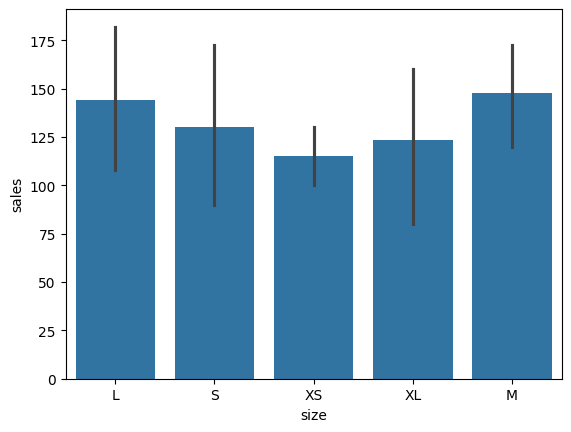

In [38]:
import seaborn as sns

sns.barplot(data=clothes_df, x='size', y='sales')

In [39]:
pd.Categorical(clothes_df['size'], ordered=True, categories=['XS','S','M','L','XL'])

['L', 'S', 'XS', 'L', 'S', ..., 'XS', 'M', 'S', 'L', 'XL']
Length: 20
Categories (5, object): ['XS' < 'S' < 'M' < 'L' < 'XL']

In [40]:
clothes_df['size'] = pd.Categorical(clothes_df['size'], ordered=True, categories=['XS','S','M','L','XL'])

In [41]:
clothes_df.sort_values(by='size')

,size,sales
9,XS,100
2,XS,120
15,XS,140
12,XS,100
1,S,200
17,S,90
4,S,140
7,S,90
16,M,150
8,M,110


In [ ]:
clothes_df.groupby